Enter the start date (YYYY-MM-DD): 20-10-2024
Enter the end date (YYYY-MM-DD): 20-11-2024


<ipython-input-3-7a38879c898d>:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  self.start_date = pd.to_datetime(start_date).tz_localize(None) if start_date else None
<ipython-input-3-7a38879c898d>:10: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  self.end_date = pd.to_datetime(end_date).tz_localize(None) if end_date else None
INFO:prophet:n_changepoints greater than number of observations. Using 2.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1dup8tox/rdie1nsh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1dup8tox/a2cy30c4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95340', 'data', 'file=/tmp/tmp1dup8to

Loading data and fitting the model...
Saving the model...
Loading the saved model and generating forecast...


<ipython-input-3-7a38879c898d>:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  self.start_date = pd.to_datetime(start_date).tz_localize(None) if start_date else None
<ipython-input-3-7a38879c898d>:10: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  self.end_date = pd.to_datetime(end_date).tz_localize(None) if end_date else None


Plotting the forecast...


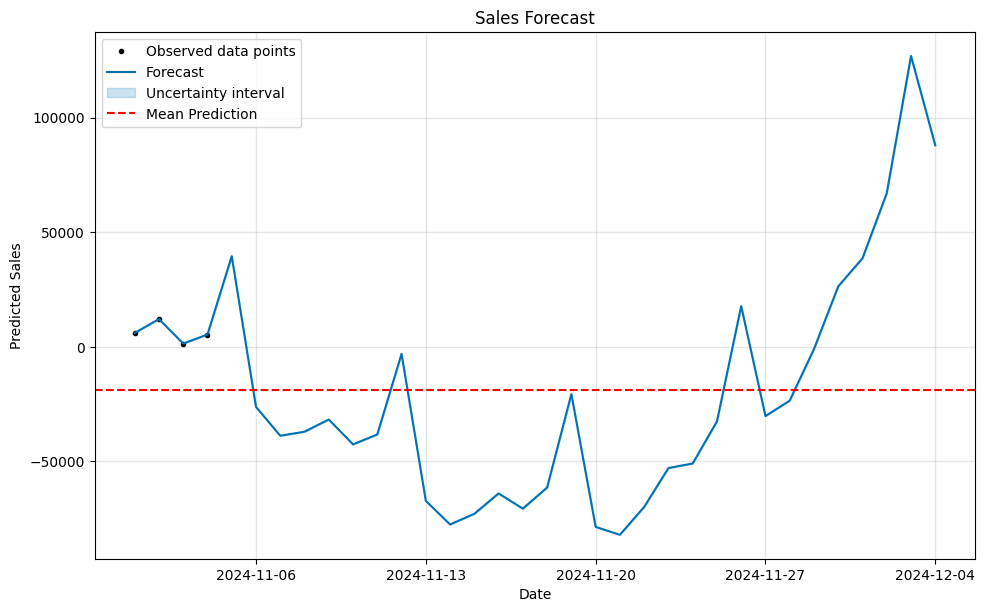

In [3]:
import pandas as pd
from prophet import Prophet
from joblib import dump, load
import matplotlib.pyplot as plt

class CombinedSalesForecaster:
    def __init__(self, data_path=None, start_date=None, end_date=None):
        self.data_path = data_path
        self.start_date = pd.to_datetime(start_date).tz_localize(None) if start_date else None
        self.end_date = pd.to_datetime(end_date).tz_localize(None) if end_date else None
        self.model = None
        self.daily_sales = None
        self.forecast = None

    def load_and_prepare_data(self):
        # Load the dataset from CSV
        data = pd.read_csv(self.data_path)

        # Ensure the 'Date' column is a datetime type and make it timezone-naive
        data['Date'] = pd.to_datetime(data['Date']).dt.tz_localize(None)

        # Filter data by date if start_date and end_date are specified
        if self.start_date and self.end_date:
            data = data[(data['Date'] >= self.start_date) & (data['Date'] <= self.end_date)]

        # Group by 'Date' and calculate daily total sales
        self.daily_sales = data.groupby(data['Date'].dt.date).agg({'Total': 'sum'}).reset_index()

        # Rename columns for compatibility with Prophet
        self.daily_sales.rename(columns={'Date': 'ds', 'Total': 'y'}, inplace=True)

    def fit_model(self):
        # Initialize and fit the Prophet model
        self.model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)

        # Fit the model on actual sales data from the CSV
        self.model.fit(self.daily_sales)

    def save_model(self, filename='combined_sales_model.joblib'):
        # Save the fitted Prophet model to a file
        dump(self.model, filename)

    @classmethod
    def load_model(cls, filename, start_date=None, end_date=None):
        # Load the Prophet model from the saved file
        model = load(filename)
        obj = cls(start_date=start_date, end_date=end_date)
        obj.model = model
        return obj

    def generate_forecast(self, periods=30):
        # Create a DataFrame for future dates for the next 'periods' days
        future = self.model.make_future_dataframe(periods=periods)

        # Generate forecast using the model
        self.forecast = self.model.predict(future)

    def plot_forecast(self):
        # Plot the forecast
        if self.forecast is not None:
            fig = self.model.plot(self.forecast)
            plt.title("Sales Forecast")
            plt.axhline(y=self.forecast['yhat'].mean(), color='red', linestyle='--', label='Mean Prediction')
            plt.legend()
            plt.xlabel("Date")
            plt.ylabel("Predicted Sales")
            plt.show()
        else:
            print("No forecast available. Please run generate_forecast() first.")

# Main script to accept user inputs and test the functionality
if __name__ == "__main__":
    # Ask the user to provide the start and end dates
    start_date = input("Enter the start date (YYYY-MM-DD): ")
    end_date = input("Enter the end date (YYYY-MM-DD): ")

    # Step 1: Initialize the forecaster with the user-provided start and end dates
    print("Loading data and fitting the model...")
    forecaster = CombinedSalesForecaster(data_path='COMBINED_MASTERDATA.csv', start_date=start_date, end_date=end_date)

    # Load and prepare the actual sales data
    forecaster.load_and_prepare_data()

    # Fit the model on actual sales data
    forecaster.fit_model()

    # Step 2: Save the model for future use
    print("Saving the model...")
    forecaster.save_model('combined_sales_model.joblib')

    # Step 3: Load the saved model for future use and generate a forecast
    print("Loading the saved model and generating forecast...")
    loaded_forecaster = CombinedSalesForecaster.load_model('combined_sales_model.joblib', start_date=start_date, end_date=end_date)

    # Generate a forecast for the next 30 days
    loaded_forecaster.generate_forecast(periods=30)

    # Step 4: Plot the forecast
    print("Plotting the forecast...")
    loaded_forecaster.plot_forecast()
 jp

DEBUG:cmdstanpy:input tempfile: /tmp/tmp1dup8tox/lh8szo8o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1dup8tox/1c2ydf8p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5728', 'data', 'file=/tmp/tmp1dup8tox/lh8szo8o.json', 'init=/tmp/tmp1dup8tox/1c2ydf8p.json', 'output', 'file=/tmp/tmp1dup8tox/prophet_model__24156e/prophet_model-20241020043707.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:37:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:37:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


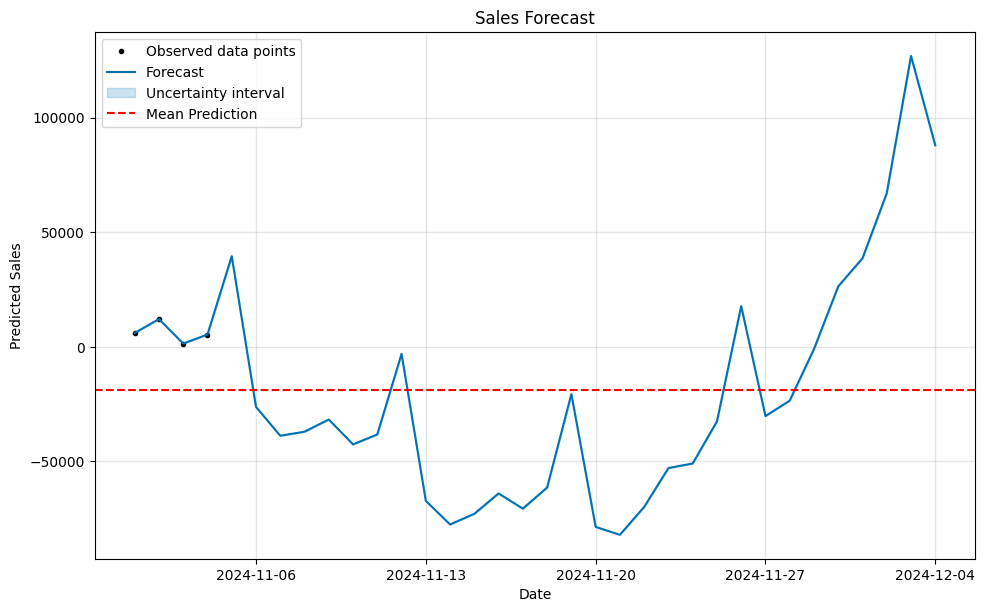

In [9]:
import pandas as pd
from prophet import Prophet
from joblib import dump, load
import matplotlib.pyplot as plt

class CombinedSalesForecaster:
    def __init__(self, data_path=None):
        self.data_path = data_path
        self.model = None
        self.daily_sales = None
        self.forecast = None

    def load_and_prepare_data(self, start_date, end_date):
        # Load the dataset from CSV
        data = pd.read_csv(self.data_path)

        # Ensure the 'Date' column is a datetime type and make it timezone-naive
        data['Date'] = pd.to_datetime(data['Date']).dt.tz_localize(None)

        # Convert start_date and end_date to datetime and make them timezone-naive
        start_date = pd.to_datetime(start_date).tz_localize(None)
        end_date = pd.to_datetime(end_date).tz_localize(None)

        # Filter data by date range
        data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]

        # Group by 'Date' and calculate daily total sales
        self.daily_sales = data.groupby(data['Date'].dt.date).agg({'Total': 'sum'}).reset_index()

        # Rename columns for compatibility with Prophet
        self.daily_sales.rename(columns={'Date': 'ds', 'Total': 'y'}, inplace=True)

    def fit_model(self):
        # Initialize and fit the Prophet model
        self.model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)

        # Fit the model on the prepared sales data
        self.model.fit(self.daily_sales)

    def save_model(self, filename='combined_sales_model.joblib'):
        # Save the fitted Prophet model to a file
        dump(self.model, filename)

    @classmethod
    def load_model(cls, filename):
        # Load the Prophet model from the saved file
        model = load(filename)
        obj = cls(data_path=None)
        obj.model = model
        return obj

    def generate_forecast(self, periods=30):
        # Create a DataFrame for future dates for the next 'periods' days
        future = self.model.make_future_dataframe(periods=periods)

        # Generate forecast using the model
        self.forecast = self.model.predict(future)

    def plot_forecast(self):
        # Plot the forecast
        if self.forecast is not None:
            fig = self.model.plot(self.forecast)
            plt.title("Sales Forecast")
            plt.axhline(y=self.forecast['yhat'].mean(), color='red', linestyle='--', label='Mean Prediction')
            plt.legend()
            plt.xlabel("Date")
            plt.ylabel("Predicted Sales")
            plt.show()
        else:
            print("No forecast available. Please run generate_forecast() first.")

# Function to run the full pipeline
def run_forecasting_pipeline(data_path, start_date, end_date, periods=30):
    # Initialize the forecaster
    forecaster = CombinedSalesForecaster(data_path=data_path)

    # Load and prepare data for the given date range
    forecaster.load_and_prepare_data(start_date, end_date)

    # Fit the model on the data
    forecaster.fit_model()

    # Save the fitted model
    forecaster.save_model('cCOMBINED_sales_model.joblib')

    # Load the saved model and generate forecast
    loaded_forecaster = CombinedSalesForecaster.load_model('combined_sales_model.joblib')
    loaded_forecaster.generate_forecast(periods=periods)

    # Plot the forecast
    loaded_forecaster.plot_forecast()



In [11]:
# Example usage:
if __name__ == "__main__":
    # Example call to run the forecasting pipeline
    run_forecasting_pipeline(
        start_date='2023-01-01',              # Start date
        end_date='2024-12-12',                # End date
        periods=30                            # Forecast periods (e.g., 30 days into the future)
    )


TypeError: run_forecasting_pipeline() missing 1 required positional argument: 'data_path'

In [12]:
import pandas as pd
from prophet import Prophet

class CombinedSalesForecaster:
    def __init__(self):
        self.model = None
        self.daily_sales = None

    def load_and_prepare_data(self, start_date, end_date):
        # Load the dataset
        data = pd.read_csv('COMBINED_MASTERDATA.csv')  # Ensure this path is correct

        # Ensure 'Date' column is datetime
        data['Date'] = pd.to_datetime(data['Date']).dt.tz_localize(None)

        # Convert and filter dates
        start_date = pd.to_datetime(start_date).tz_localize(None)
        end_date = pd.to_datetime(end_date).tz_localize(None)
        data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]

        # Aggregate daily sales
        self.daily_sales = data.groupby(data['Date'].dt.date).agg({'Total': 'sum'}).reset_index()
        self.daily_sales.rename(columns={'Date': 'ds', 'Total': 'y'}, inplace=True)

    def fit_model(self):
        # Initialize and fit the Prophet model
        self.model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
        self.model.fit(self.daily_sales)

# Fit the model
forecaster = CombinedSalesForecaster()
forecaster.load_and_prepare_data(start_date='2023-01-01', end_date='2024-12-12')
forecaster.fit_model()

print("Model has been fitted successfully.")


DEBUG:cmdstanpy:input tempfile: /tmp/tmp1dup8tox/n5vc_q24.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1dup8tox/z0uffhc8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91155', 'data', 'file=/tmp/tmp1dup8tox/n5vc_q24.json', 'init=/tmp/tmp1dup8tox/z0uffhc8.json', 'output', 'file=/tmp/tmp1dup8tox/prophet_modeludoreum9/prophet_model-20241020044137.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:41:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:41:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model has been fitted successfully.


In [13]:
import pandas as pd
from prophet import Prophet

class CombinedSalesForecaster:
    def __init__(self):
        self.model = None
        self.daily_sales = None

    def fit_model(self, daily_sales):
        # Accept daily sales data directly for fitting the model
        self.daily_sales = daily_sales
        self.model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
        self.model.fit(self.daily_sales)




In [14]:
# Step 2: Prepare the data externally
def prepare_data(start_date, end_date):
    data = pd.read_csv('COMBINED_MASTERDATA.csv')  # Load the dataset here
    data['Date'] = pd.to_datetime(data['Date']).dt.tz_localize(None)

    # Convert and filter dates
    start_date = pd.to_datetime(start_date).tz_localize(None)
    end_date = pd.to_datetime(end_date).tz_localize(None)
    data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]

    # Aggregate daily sales
    daily_sales = data.groupby(data['Date'].dt.date).agg({'Total': 'sum'}).reset_index()
    daily_sales.rename(columns={'Date': 'ds', 'Total': 'y'}, inplace=True)
    return daily_sales



In [15]:
# Step 3: Test the Pipeline
def run_forecasting_pipeline(start_date, end_date, periods=30):
    # Prepare the data
    daily_sales = prepare_data(start_date, end_date)

    # Initialize the forecaster and fit the model
    forecaster = CombinedSalesForecaster()
    forecaster.fit_model(daily_sales)

    # Generate forecast
    forecast = forecaster.model.make_future_dataframe(periods=periods)
    forecast = forecaster.model.predict(forecast)
    return forecast

# Example usage
if __name__ == "__main__":
    forecast_results = run_forecasting_pipeline(
        start_date='2023-01-01',
        end_date='2024-12-12',
        periods=30
    )
    print(forecast_results[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

DEBUG:cmdstanpy:input tempfile: /tmp/tmp1dup8tox/yjxntjy3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1dup8tox/6s30p9_4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16664', 'data', 'file=/tmp/tmp1dup8tox/yjxntjy3.json', 'init=/tmp/tmp1dup8tox/6s30p9_4.json', 'output', 'file=/tmp/tmp1dup8tox/prophet_model__bmj_gf/prophet_model-20241020044409.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:44:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:44:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


            ds          yhat    yhat_lower    yhat_upper
0   2023-01-09  -3085.978288 -12576.290731   6361.565156
1   2023-02-08  -2709.491560 -12531.055313   6844.974650
2   2023-02-09  -2741.422366 -12460.283313   7185.013040
3   2023-02-10  -2447.485547 -12531.091005   7482.489605
4   2023-02-12   9444.851662   -349.751652  19238.223885
..         ...           ...           ...           ...
412 2024-12-30  17738.282695   8024.372420  26910.294488
413 2024-12-31  18786.480985   9077.205786  27384.571268
414 2025-01-01  19051.290255   9233.831057  28838.713290
415 2025-01-02  19162.637429   9546.201187  29247.244294
416 2025-01-03  19574.739554  10143.568955  29075.151215

[417 rows x 4 columns]


In [19]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from joblib import dump, load

class CombinedSalesForecaster:
    def __init__(self):
        self.model = None
        self.daily_sales = None

    def fit_model(self, daily_sales):
        # Accept daily sales data directly for fitting the model
        self.daily_sales = daily_sales
        self.model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
        self.model.fit(self.daily_sales)

    def save_model(self, filename='combined_sales_model.joblib'):
        # Save the fitted model
        dump(self.model, filename)

    def plot_forecast(self, forecast):
        # Plot the forecast
        fig = self.model.plot(forecast)
        plt.title("Sales Forecast")
        plt.axhline(y=forecast['yhat'].mean(), color='red', linestyle='--', label='Mean Prediction')
        plt.legend()
        plt.xlabel("Date")
        plt.ylabel("Predicted Sales")
        plt.show()

# Step 2: Prepare the data externally
def prepare_data(start_date, end_date):
    data = pd.read_csv('COMBINED_MASTERDATA.csv')  # Load the dataset here
    data['Date'] = pd.to_datetime(data['Date']).dt.tz_localize(None)

    # Convert and filter dates
    start_date = pd.to_datetime(start_date).tz_localize(None)
    end_date = pd.to_datetime(end_date).tz_localize(None)
    data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]

    # Aggregate daily sales
    daily_sales = data.groupby(data['Date'].dt.date).agg({'Total': 'sum'}).reset_index()
    daily_sales.rename(columns={'Date': 'ds', 'Total': 'y'}, inplace=True)
    return daily_sales

# Step 3: Test the Pipeline
def run_forecasting_pipeline(start_date, end_date, periods=30):
    # Prepare the data
    daily_sales = prepare_data(start_date, end_date)

    # Initialize the forecaster and fit the model
    forecaster = CombinedSalesForecaster()
    forecaster.fit_model(daily_sales)

    # Generate forecast
    future = forecaster.model.make_future_dataframe(periods=periods)
    forecast = forecaster.model.predict(future)

    # Save the model pipeline
    forecaster.save_model('COMBINED_SALES_MODEL.joblib')

    # Plot the forecast
    forecaster.plot_forecast(forecast)

    return forecast




DEBUG:cmdstanpy:input tempfile: /tmp/tmp1dup8tox/pfkxijb_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1dup8tox/__dc56wj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74125', 'data', 'file=/tmp/tmp1dup8tox/pfkxijb_.json', 'init=/tmp/tmp1dup8tox/__dc56wj.json', 'output', 'file=/tmp/tmp1dup8tox/prophet_model63pc7jdy/prophet_model-20241020044901.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:49:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:49:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


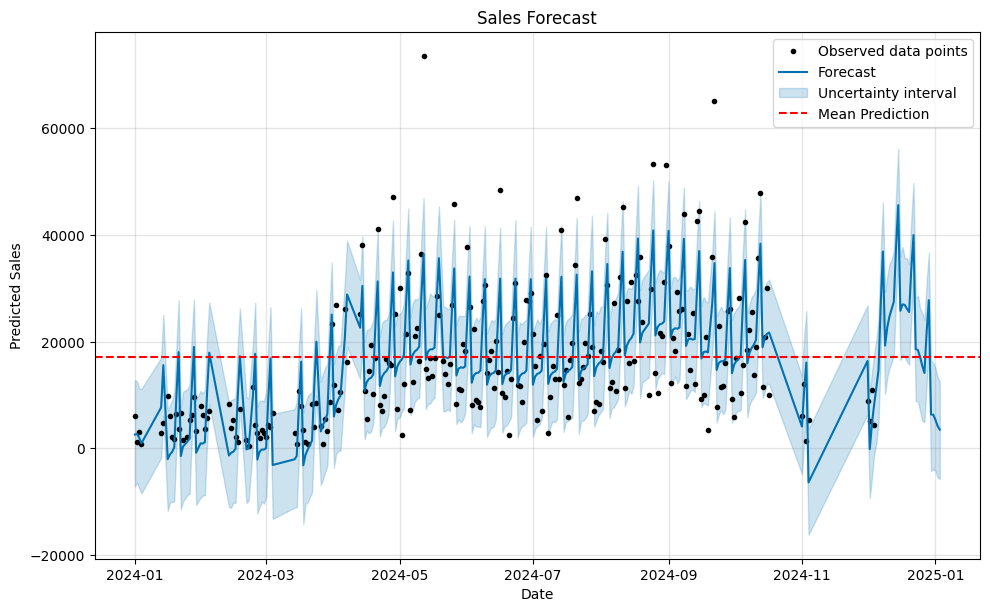

            ds         yhat   yhat_lower    yhat_upper
0   2024-01-01  2600.854882 -7141.202931  12784.583658
1   2024-01-02  2725.708513 -6356.745450  12524.160732
2   2024-01-03  1952.448038 -7551.324201  11190.520785
3   2024-01-04   973.932126 -8404.083784  11168.422590
4   2024-01-13  7680.428119 -1802.720690  16975.600288
..         ...          ...          ...           ...
281 2024-12-30  6353.615604 -4227.756467  16394.270471
282 2024-12-31  6324.837661 -3848.844929  16103.283471
283 2025-01-01  5379.121358 -4145.262453  15104.016476
284 2025-01-02  4214.077023 -5439.608313  13456.357199
285 2025-01-03  3525.599913 -5729.522799  12575.711282

[286 rows x 4 columns]


In [21]:
# Example usage
if __name__ == "__main__":
    forecast_results = run_forecasting_pipeline(
        start_date='2024-01-01',
        end_date='2024-12-12',
        periods=30
    )
    print(forecast_results[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])